# Python API Homework - What's the Weather Like?

## Background

Whether financial, political, or social -- data's true power lies in its
ability to answer questions definitively. So let's take what you've learned 
about Python requests, APIs, and JSON traversals to answer a fundamental
question: "What's the weather like as we approach the equator?"

Now, we know what you may be thinking: _"Duh. It gets hotter..."_

But, if pressed, how would you **prove** it?

![Equator](Images/equatorsign.png)

### Before You Begin

1. Create a new repository for this project called `python-api-challenge`. 
   **Do not add this homework to an existing repository**.

2. Clone the new repository to your computer.

3. Inside your local git repository, create a directory for both of the
   Python Challenges. Use folder names corresponding to the challenges: **WeatherPy**.

        
4. Inside the folder that you just created, add new files called `WeatherPy.ipynb` 
   and `VacationPy.ipynb`. These will be the main scripts to run for each
   analysis.

5. Push the above changes to GitHub.

*******************************************************


## Part I - WeatherPy

In this example, you'll be creating a Python script to visualize the weather of 
500+ cities across the world of varying distance from the equator. 
To accomplish this, you'll be utilizing a [simple Python library]
(https://pypi.python.org/pypi/citipy), 
the [OpenWeatherMap API](https://openweathermap.org/api), and a little 
common sense to create a representative model of weather across world cities.

Your first requirement is to create a series of scatter plots to showcase 
the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

After each plot add a sentence or too explaining what the code is and 
analyzing.

Your second requirement is to run linear regression on each relationship, 
only this time separating them into Northern Hemisphere (greater than 
or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 
degrees latitude):

* Northern Hemisphere - Temperature (F) vs. Latitude
* Southern Hemisphere - Temperature (F) vs. Latitude
* Northern Hemisphere - Humidity (%) vs. Latitude
* Southern Hemisphere - Humidity (%) vs. Latitude
* Northern Hemisphere - Cloudiness (%) vs. Latitude
* Southern Hemisphere - Cloudiness (%) vs. Latitude
* Northern Hemisphere - Wind Speed (mph) vs. Latitude
* Southern Hemisphere - Wind Speed (mph) vs. Latitude

After each pair of plots explain what the linear regression is modeling 
such as any relationships you notice and any other analysis you may have.

**Optional** You will be creating multiple linear regression plots. 
To optimize your code, write a function that creates the linear regression plots.

Your final notebook must:

* Randomly select **at least** 500 unique (non-repeat) cities based on 
  latitude and longitude.
* Perform a weather check on each of the cities using a series of successive 
  API calls.
* Include a print log of each city as it's being processed with the city 
  number and city name.
* Save a CSV of all retrieved data and a PNG image for each scatter plot.





# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import csv
import json
import urllib
import seaborn as sns
from scipy.stats import linregress
from sklearn import datasets

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# OpenWeatherMap API Key
api_key = weather_api_key = "9dc1a0bf941ca8432869138d960cbd37"

# Starting URL for Weather Map API Call
url = 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=' + api_key

url, api_key

('http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37',
 '9dc1a0bf941ca8432869138d960cbd37')

In [4]:
# I was having some trouble with the appropriate way to perform the api calls so I have two versions thus far!!!!
# Making an empty list to which we will append information obtained from these api calls and the
# output and enter them into lists and then into a DataFrame for further analyses and visualization

city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + urllib.request.pathname2url(city)

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    print(city_url)

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_latitute = city_weather["coord"]["lat"]
        city_longitude = city_weather["coord"]["lon"]
        city_max_temperature = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_latitute, 
                          "Lng": city_longitude, 
                          "Max Temp": city_max_temperature,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ribeira grande
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=ribeira%20grande
Processing Record 2 of Set 1 | mataura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=mataura
Processing Record 3 of Set 1 | apatity
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=apatity
Processing Record 4 of Set 1 | hithadhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=hithadhoo
Processing Record 5 of Set 1 | rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=rikitea
Processing Record 6 of Set 1 | krasnyy chikoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=krasnyy%20chikoy
Proc

Processing Record 8 of Set 2 | saint-philippe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=saint-philippe
Processing Record 9 of Set 2 | hermanus
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=hermanus
Processing Record 10 of Set 2 | skibbereen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=skibbereen
Processing Record 11 of Set 2 | berlevag
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=berlevag
Processing Record 12 of Set 2 | faanui
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=faanui
Processing Record 13 of Set 2 | albany
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=albany
Processing Record 14 of Set 2 | prado
http://api.openweathermap.org/data/2.5

City not found...
Processing Record 13 of Set 3 | provideniya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=provideniya
Processing Record 14 of Set 3 | leningradskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=leningradskiy
Processing Record 15 of Set 3 | san julian
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=san%20julian
Processing Record 16 of Set 3 | guerrero negro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=guerrero%20negro
Processing Record 17 of Set 3 | kasempa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=kasempa
Processing Record 18 of Set 3 | port alfred
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=port%20alfred
Processing Record 19 o

Processing Record 20 of Set 4 | upernavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=upernavik
Processing Record 21 of Set 4 | ostrovnoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=ostrovnoy
Processing Record 22 of Set 4 | vestmannaeyjar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=vestmannaeyjar
Processing Record 23 of Set 4 | troina
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=troina
Processing Record 24 of Set 4 | roebourne
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=roebourne
Processing Record 25 of Set 4 | toyooka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=toyooka
Processing Record 26 of Set 4 | bluff
http://api.openweathermap.org/da

Processing Record 27 of Set 5 | husavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=husavik
Processing Record 28 of Set 5 | nago
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=nago
Processing Record 29 of Set 5 | vanderhoof
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=vanderhoof
Processing Record 30 of Set 5 | laguna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=laguna
Processing Record 31 of Set 5 | bonavista
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=bonavista
Processing Record 32 of Set 5 | asau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=asau
Processing Record 33 of Set 5 | akdepe
http://api.openweathermap.org/data/2.5/weather?units=Imperi

Processing Record 33 of Set 6 | watsa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=watsa
Processing Record 34 of Set 6 | oranjestad
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=oranjestad
Processing Record 35 of Set 6 | manali
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=manali
Processing Record 36 of Set 6 | dikson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=dikson
Processing Record 37 of Set 6 | jambi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=jambi
Processing Record 38 of Set 6 | erfurt
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=erfurt
Processing Record 39 of Set 6 | lebu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APP

City not found...
Processing Record 37 of Set 7 | korla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=korla
Processing Record 38 of Set 7 | clyde river
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=clyde%20river
Processing Record 39 of Set 7 | yulara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=yulara
Processing Record 40 of Set 7 | coquimbo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=coquimbo
Processing Record 41 of Set 7 | balabac
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=balabac
Processing Record 42 of Set 7 | takoradi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=takoradi
Processing Record 43 of Set 7 | fairbanks
http://api.openweathermap.

Processing Record 42 of Set 8 | jacareacanga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=jacareacanga
Processing Record 43 of Set 8 | umtata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=umtata
Processing Record 44 of Set 8 | egvekinot
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=egvekinot
Processing Record 45 of Set 8 | palabuhanratu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=palabuhanratu
City not found...
Processing Record 46 of Set 8 | meulaboh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=meulaboh
Processing Record 47 of Set 8 | mocambique
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=mocambique
City not found...
Processing Record 48 of Se

Processing Record 47 of Set 9 | brae
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=brae
Processing Record 48 of Set 9 | salamiyah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=salamiyah
Processing Record 49 of Set 9 | fortuna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=fortuna
Processing Record 0 of Set 10 | toba tek singh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=toba%20tek%20singh
Processing Record 1 of Set 10 | ayolas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=ayolas
Processing Record 2 of Set 10 | ambilobe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=ambilobe
Processing Record 3 of Set 10 | hirtshals
http://api.openweathermap.org/data/2

Processing Record 2 of Set 11 | bucerias
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=bucerias
Processing Record 3 of Set 11 | sao filipe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=sao%20filipe
Processing Record 4 of Set 11 | le port
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=le%20port
Processing Record 5 of Set 11 | polkowice
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=polkowice
Processing Record 6 of Set 11 | hihifo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=hihifo
City not found...
Processing Record 7 of Set 11 | luderitz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=luderitz
Processing Record 8 of Set 11 | peterhead
http://api.openwea

Processing Record 9 of Set 12 | booue
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=booue
Processing Record 10 of Set 12 | mildura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=mildura
Processing Record 11 of Set 12 | camana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=camana
Processing Record 12 of Set 12 | safwah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=safwah
City not found...
Processing Record 13 of Set 12 | broome
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=broome
Processing Record 14 of Set 12 | yashkul
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=yashkul
Processing Record 15 of Set 12 | mayya
http://api.openweathermap.org/data/2.5/wea

Processing Record 12 of Set 13 | honiara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=honiara
Processing Record 13 of Set 13 | fort-shevchenko
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=fort-shevchenko
Processing Record 14 of Set 13 | maningrida
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=maningrida
Processing Record 15 of Set 13 | uruzgan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=uruzgan
Processing Record 16 of Set 13 | nishihara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=nishihara
Processing Record 17 of Set 13 | bambanglipuro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=bambanglipuro
Processing Record 18 of Set 13 | umm lajj
http://a

In [5]:
# place above data into a DataFrame
city_data_pd = pd.DataFrame(city_data)

In [6]:
city_data_pd

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ribeira grande,38.52,-28.70,73.40,69,40,5.82,PT,1595531217
1,mataura,-46.19,168.86,39.00,83,100,3.00,NZ,1595531217
2,apatity,67.56,33.40,58.39,82,77,9.04,RU,1595531217
3,hithadhoo,-0.60,73.08,83.43,68,100,3.00,MV,1595530941
4,rikitea,-23.12,-134.97,66.92,64,0,17.85,PF,1595531217
...,...,...,...,...,...,...,...,...,...
574,bambanglipuro,-7.95,110.28,74.16,87,100,8.95,ID,1595531254
575,umm lajj,25.02,37.27,91.49,44,3,7.63,SA,1595531012
576,sibolga,1.74,98.78,75.60,77,100,3.22,ID,1595531254
577,yar-sale,66.83,70.83,48.97,73,21,8.10,RU,1595531254


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Export the City_Data into a csv
city_data_pd.to_csv("WeatherPy.csv",encoding="utf-8",index=False)


# Show Record Count
city_data_pd.count()



City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [8]:
# Display the City Data Frame
city_data_pd

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ribeira grande,38.52,-28.70,73.40,69,40,5.82,PT,1595531217
1,mataura,-46.19,168.86,39.00,83,100,3.00,NZ,1595531217
2,apatity,67.56,33.40,58.39,82,77,9.04,RU,1595531217
3,hithadhoo,-0.60,73.08,83.43,68,100,3.00,MV,1595530941
4,rikitea,-23.12,-134.97,66.92,64,0,17.85,PF,1595531217
...,...,...,...,...,...,...,...,...,...
574,bambanglipuro,-7.95,110.28,74.16,87,100,8.95,ID,1595531254
575,umm lajj,25.02,37.27,91.49,44,3,7.63,SA,1595531012
576,sibolga,1.74,98.78,75.60,77,100,3.22,ID,1595531254
577,yar-sale,66.83,70.83,48.97,73,21,8.10,RU,1595531254


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
# First filter out those rows which the rows don't contain any data

city_data_pd_dropna = city_data_pd.dropna(how = 'all') 
city_data_pd_dropna  



,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ribeira grande,38.52,-28.70,73.40,69,40,5.82,PT,1595531217
1,mataura,-46.19,168.86,39.00,83,100,3.00,NZ,1595531217
2,apatity,67.56,33.40,58.39,82,77,9.04,RU,1595531217
3,hithadhoo,-0.60,73.08,83.43,68,100,3.00,MV,1595530941
4,rikitea,-23.12,-134.97,66.92,64,0,17.85,PF,1595531217
...,...,...,...,...,...,...,...,...,...
574,bambanglipuro,-7.95,110.28,74.16,87,100,8.95,ID,1595531254
575,umm lajj,25.02,37.27,91.49,44,3,7.63,SA,1595531012
576,sibolga,1.74,98.78,75.60,77,100,3.22,ID,1595531254
577,yar-sale,66.83,70.83,48.97,73,21,8.10,RU,1595531254


In [10]:
#  Get the indices of cities that have humidity over 100%.
#  Get the indices of cities that have humidity over 100%.
# Filter all rows for which the cities' humidities are = 100%
city_data_pd_filtered = city_data_pd[(city_data_pd["Humidity"] == 100)]
  
# Print the new dataframe 
city_data_pd_filtered 

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
11,hambantota,6.12,81.12,75.20,100,40,6.93,LK,1595531004
54,berlevag,70.86,29.09,50.00,100,90,2.24,NO,1595531220
89,vaini,-21.20,-175.20,68.00,100,75,13.73,TO,1595531223
164,moba,33.23,105.02,61.59,100,100,1.81,CN,1595531228
176,mar del plata,-38.00,-57.56,55.99,100,90,8.05,AR,1595530980
204,avarua,-21.21,-159.78,73.40,100,46,4.70,CK,1595531230
258,oudtshoorn,-33.59,22.20,55.40,100,0,4.70,ZA,1595531234
287,hasaki,35.73,140.83,70.00,100,40,2.21,JP,1595531237
323,petropavlovsk-kamchatskiy,53.05,158.65,53.60,100,20,2.24,RU,1595530961
384,guaruja,-23.99,-46.26,75.00,100,100,1.99,BR,1595531243


In [11]:
city_data_pd_filtered.shape

(15, 9)

In [15]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
# Filter all rows for which city's have a humidity equal to 100%

clean_city_data = city_data_pd.drop(city_data_pd[city_data_pd["Humidity"] >= 100].index, inplace = False) 

clean_city_data 



,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ribeira grande,38.52,-28.70,73.40,69,40,5.82,PT,1595531217
1,mataura,-46.19,168.86,39.00,83,100,3.00,NZ,1595531217
2,apatity,67.56,33.40,58.39,82,77,9.04,RU,1595531217
3,hithadhoo,-0.60,73.08,83.43,68,100,3.00,MV,1595530941
4,rikitea,-23.12,-134.97,66.92,64,0,17.85,PF,1595531217
...,...,...,...,...,...,...,...,...,...
574,bambanglipuro,-7.95,110.28,74.16,87,100,8.95,ID,1595531254
575,umm lajj,25.02,37.27,91.49,44,3,7.63,SA,1595531012
576,sibolga,1.74,98.78,75.60,77,100,3.22,ID,1595531254
577,yar-sale,66.83,70.83,48.97,73,21,8.10,RU,1595531254


In [16]:
# Extract relevant fields from the data frame-->done


# Export the City_Data into a csv
clean_city_data.to_csv("clean_city_data.csv",encoding="utf-8",index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

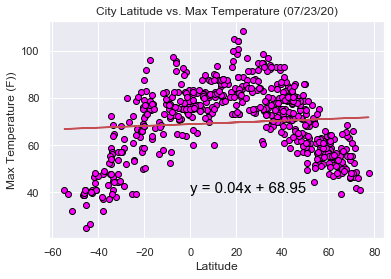

In [50]:
# # Build scatter plot for latitude vs temperature
# plt.scatter(clean_city_data["Lat"], 
#             clean_city_data["Max Temp"],
#             edgecolor="black", linewidths=1, marker="o",c = "magenta", 
#             alpha=0.8, label="Cities")

# # Incorporate the other graph properties
# plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
# plt.ylabel("Max Temperature (F)")
# plt.xlabel("Latitude")
# plt.grid(True)
# sns.set()

# # Save the plot
# plt.savefig("Latitude vs Temperature (F).png")

# # show the graph we coded for...
plt.show()


# Add the linear regression equation and line to plot
x_values = clean_city_data['Lat']
y_values = clean_city_data['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, c = "magenta", edgecolor="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,40),fontsize=15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F))')
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.show()


## Latitude vs. Humidity Plot

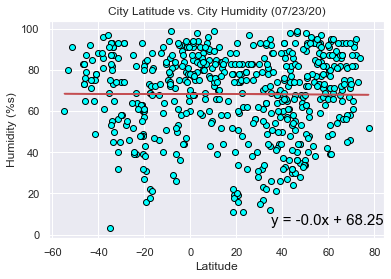

In [53]:
# # Build the scatter plots for each city types
# plt.scatter(clean_city_data["Lat"], 
#             clean_city_data["Humidity"],
#             edgecolor="black", linewidths=1, marker="o", c = "cyan",
#             alpha=0.8, label="Cities")

# # Incorporate the other graph properties
# plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
# plt.ylabel("Humidity (%)")
# plt.xlabel("Latitude")
# plt.grid(True)
# sns.set()

# # Save the figure
# plt.savefig("Latitude vs Humidity (%).png")

# # Show plot
# plt.show()

# Add the linear regression equation and line to plot
x_values = clean_city_data['Lat']
y_values = clean_city_data['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, c = "cyan", edgecolor="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(35,5),fontsize = 15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%s)')
plt.title("City Latitude vs. City Humidity (%s)" % time.strftime("%x"))
plt.show()




## Latitude vs. Cloudiness Plot

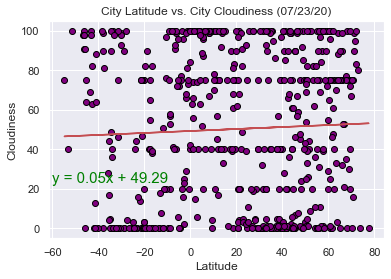

In [58]:
# # Build the scatter plots for each city types
# plt.scatter(clean_city_data["Lat"], 
#             clean_city_data["Cloudiness"],
#             edgecolor="black", linewidths=1, marker="o", c = "purple",
#             alpha=0.8, label="Cities")

# # Incorporate the other graph properties
# plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
# plt.ylabel("Cloudiness (%)")
# plt.xlabel("Latitude")
# plt.grid(True)
# sns.set()

# # Save the figure
# plt.savefig("Latitude vs Cloudiness (%).png")

# # Show plot
# plt.show()


# Add the linear regression equation and line to plot
x_values = clean_city_data['Lat']
y_values = clean_city_data['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, c = "purple", edgecolor="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-60,23),fontsize = 15,color="green")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("City Latitude vs. City Cloudiness (%s)" % time.strftime("%x"))
plt.show()



## Latitude vs. Wind Speed Plot

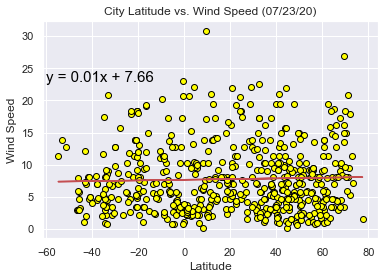

In [60]:
# # Build the scatter plots for each city types
# plt.scatter(clean_city_data["Lat"], 
#             clean_city_data["Wind Speed"],
#             edgecolor="black", linewidths=1, marker="o", c = "green", 
#             alpha=0.8, label="Cities")

# # Incorporate the other graph properties
# plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
# plt.ylabel("Wind Speed (mph)")
# plt.xlabel("Latitude")
# plt.grid(True)
# sns.set()

# # Save the figure
# plt.savefig("Latitude vs Wind Speed (MPH).png")

# # Show plot
# plt.show()

# Add the linear regression equation and line to plot
x_values = clean_city_data['Lat']
y_values = clean_city_data['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, c = "yellow", edgecolor="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-60,23),fontsize = 15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.show()

## Linear Regression

In [31]:
# Create Northern and Southern Hemisphere DataFrames
# Create Northern and Southern Hemisphere DataFrames
north_h_df = clean_city_data.loc[(clean_city_data["Lat"] >= 0)]
south_h_df = clean_city_data.loc[(clean_city_data["Lat"] < 0)]

In [32]:
# Northern Hemispher data from cleaned data set
north_h_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ribeira grande,38.52,-28.70,73.40,69,40,5.82,PT,1595531217
2,apatity,67.56,33.40,58.39,82,77,9.04,RU,1595531217
5,krasnyy chikoy,50.36,108.75,59.00,89,69,2.57,RU,1595531217
8,marrakesh,31.63,-8.01,98.60,23,20,9.17,MA,1595531168
9,olafsvik,64.89,-23.71,48.94,68,0,18.72,IS,1595531218
...,...,...,...,...,...,...,...,...,...
573,nishihara,26.18,127.76,84.20,83,20,12.75,JP,1595531254
575,umm lajj,25.02,37.27,91.49,44,3,7.63,SA,1595531012
576,sibolga,1.74,98.78,75.60,77,100,3.22,ID,1595531254
577,yar-sale,66.83,70.83,48.97,73,21,8.10,RU,1595531254


In [33]:
# Southern Hemispher data from cleaned data set
south_h_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,mataura,-46.19,168.86,39.00,83,100,3.00,NZ,1595531217
3,hithadhoo,-0.60,73.08,83.43,68,100,3.00,MV,1595530941
4,rikitea,-23.12,-134.97,66.92,64,0,17.85,PF,1595531217
6,mahebourg,-20.41,57.70,68.00,60,75,18.34,MU,1595531217
7,souillac,-20.52,57.52,68.00,60,75,18.34,MU,1595531011
...,...,...,...,...,...,...,...,...,...
563,conde,-7.26,-34.91,82.40,65,40,17.22,BR,1595531253
567,pringsewu,-5.36,104.97,72.54,93,96,0.78,ID,1595531254
569,honiara,-9.43,159.95,77.11,79,100,8.84,SB,1595531254
571,maningrida,-12.07,134.27,64.76,91,0,7.09,AU,1595530954


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [96]:
# OPTIONAL: Create a function to create Linear Regression plots

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, x_label, y_label, text_coordinates, color, edgecolor_parameter):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values, edgecolor = edgecolor_parameter, c = color)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="black")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()





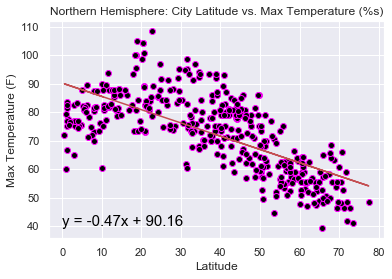

In [97]:
# Build scatter plot for latitude vs temperature using function created in above cell

plot_linear_regression(north_h_df["Lat"], north_h_df['Max Temp'],
                       "Northern Hemisphere: City Latitude vs. Max Temperature (%s)", "Latitude", "Max Temperature (F)",
                       (0,40),"black", "magenta")



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

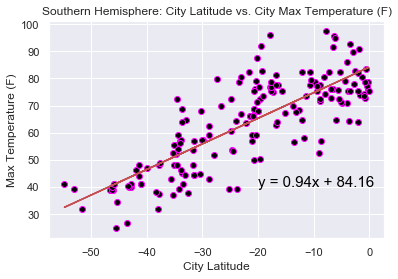

<Figure size 432x288 with 0 Axes>

In [98]:
# plt.scatter(south_h_df["Lat"], 
#             south_h_df["Max Temp"],
#             edgecolor="black", linewidths=1, marker="o",c = "red", 
#             alpha=0.8, label="Cities")

# # Incorporate the other graph properties
# plt.title("Southern Hemisphere: City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
# plt.ylabel("Max Temperature (F)")
# plt.plot(x_values,regress_values,"r-", c= "black")
# plt.annotate(line_eq,(0,30),fontsize=15,color= "black")
# plt.xlabel('Latitude in Northern Hemisphere')
# plt.ylabel("Max Temperature (F)")
# plt.show()
# #plt.grid(True)
# #sns.set()
# # Show plot
# plt.show()


plot_linear_regression(south_h_df["Lat"], south_h_df['Max Temp'],
                       "Southern Hemisphere: City Latitude vs. City Max Temperature (F)", "City Latitude", 
                       "Max Temperature (F)", (-20,40),"black", "magenta")

# Save the figure
plt.savefig("Southern Hemisphere: City Latitude vs. City Max Temperature (F.png")





# #Add the linear regression equation and line to plot
# x_values = south_h_df["Lat"]
# y_values = south_h_df['Max Temp']
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.scatter(x_values,y_values, c = "magenta")
# plt.plot(x_values,regress_values,"r-", c= "black")
# plt.annotate(line_eq,(-50,80),fontsize=15,color= "black")
# plt.xlabel('Latitude in Northern Hemisphere')
# plt.ylabel("Max Temperature (F)")
# plt.show()



####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

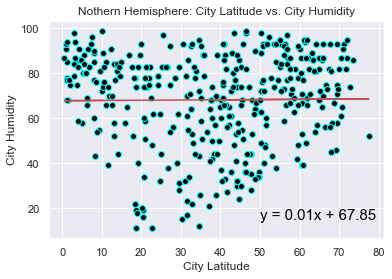

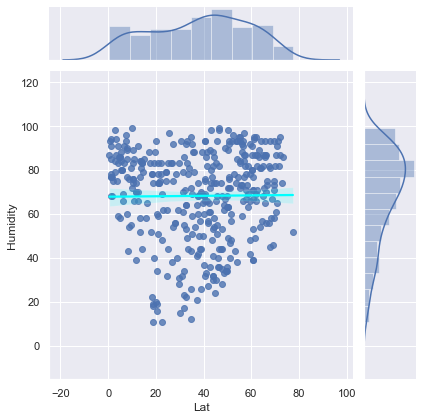

In [99]:
import numpy as np, pandas as pd; np.random.seed(0)
import seaborn as sns#; sns.set(style="white", color_codes=True)



plot_linear_regression(north_h_df["Lat"], north_h_df['Humidity'],
                       "Nothern Hemisphere: City Latitude vs. City Humidity", "City Latitude", 
                       "City Humidity", (50,15),"black", "cyan")


# This is extra code,from https://stackoverflow.com/questions/31568874/how-to-change-the-line-color-in-seaborn-linear-regression-jointplot
# I have been searching to simply change the regression line color to anything but red, this is all I could find, so mind the first figure but
# the next ones are cool too
g = sns.jointplot(x = north_h_df["Lat"], y= north_h_df['Humidity'], data=tips, kind='reg',
                  joint_kws={'line_kws':{'color':'cyan'}}) # Only regression cyan


# Save the figure
plt.savefig("Nothern Hemisphere: City Latitude vs. City Humidity.png")

# Show plot
# plt.show()
# 
# # Add the linear regression equation and line to plot
# x_values = north_h_df["Lat"]
# y_values = north_h_df['Humidity']
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.scatter(x_values,y_values, c = "magenta")
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(6,10),fontsize=15,c = "black")
# plt.xlabel('Latitude in Northern Hemisphere')
# plt.ylabel("Humidity)")
# plt.show()



####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

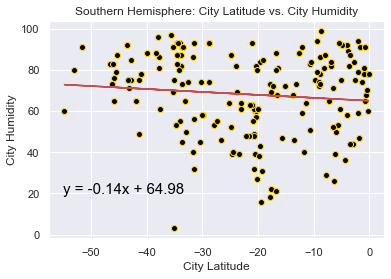

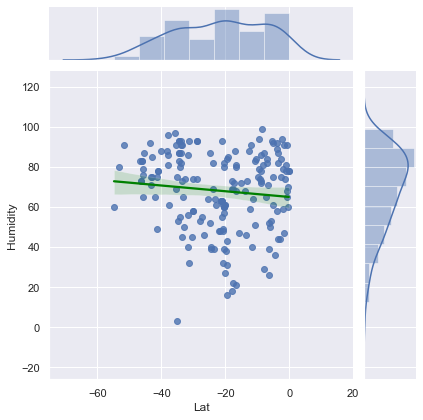

In [100]:
plot_linear_regression(south_h_df["Lat"], south_h_df['Humidity'],
                       "Southern Hemisphere: City Latitude vs. City Humidity", "City Latitude", 
                       "City Humidity", (-55,20),"black", "gold")


# This is extra code,from https://stackoverflow.com/questions/31568874/how-to-change-the-line-color-in-seaborn-linear-regression-jointplot
# I have been searching to simply change the regression line color to anything but red, this is all I could find, so mind the first figure but
# the next ones are cool too
g = sns.jointplot(x = south_h_df["Lat"], y= south_h_df['Humidity'], data=tips, kind='reg',
                  joint_kws={'line_kws':{'color':'green'}}) # Only regression green



####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

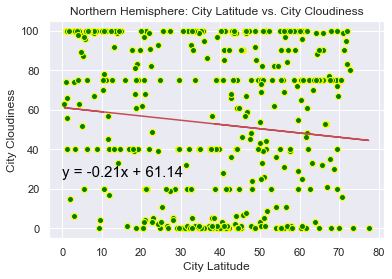

In [101]:
plot_linear_regression(north_h_df["Lat"], north_h_df['Cloudiness'],
                       "Northern Hemisphere: City Latitude vs. City Cloudiness", "City Latitude", 
                       "City Cloudiness", (0,26),"green", "yellow")



####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

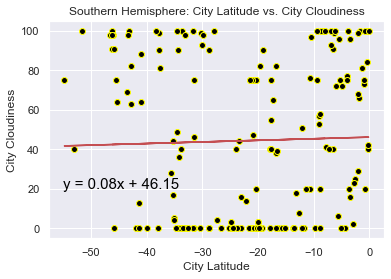

In [105]:
plot_linear_regression(south_h_df["Lat"], south_h_df['Cloudiness'],
                       "Southern Hemisphere: City Latitude vs. City Cloudiness", "City Latitude", 
                       "City Cloudiness", (-55,20),"black", "yellow")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

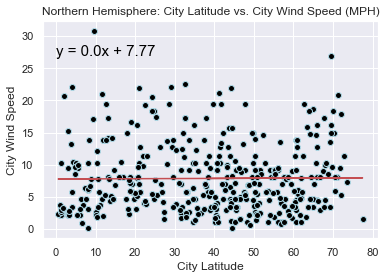

In [107]:
plot_linear_regression(north_h_df["Lat"], north_h_df['Wind Speed'],
                       "Northern Hemisphere: City Latitude vs. City Wind Speed (MPH)", "City Latitude", 
                       "City Wind Speed", (0,27),"black", "lightblue")
 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

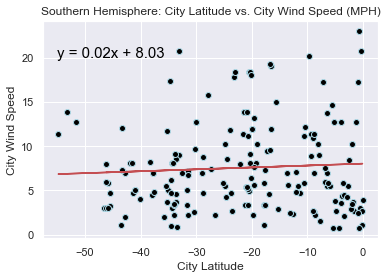

In [109]:
plot_linear_regression(south_h_df["Lat"], south_h_df['Wind Speed'],
                       "Southern Hemisphere: City Latitude vs. City Wind Speed (MPH)", "City Latitude", 
                       "City Wind Speed", (-55,20),"black", "lightblue")
 